In [19]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [5]:
#load dataset
df = pd.read_csv("C:\\Users\\Hp\\Downloads\\Salary_dataset.csv") 


In [6]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [7]:
# Define target and features
X = df.drop(columns=['Salary'])  
y = df['Salary']


In [8]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
#Scale features (important for Lasso)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
#Lasso Regression with Cross-Validation
lasso_cv = LassoCV(alphas=np.logspace(-4, 4, 100), cv=5, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

#Best alpha
best_alpha = lasso_cv.alpha_
print(f"Best alpha (regularization strength): {best_alpha:.4f}")

Best alpha (regularization strength): 200.9233


In [14]:
# Predict using best model
y_pred = lasso_cv.predict(X_test_scaled)

In [15]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n📈 Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


📈 Evaluation Metrics:
MAE: 6269.02
MSE: 50053750.71
RMSE: 7074.87
R² Score: 0.90


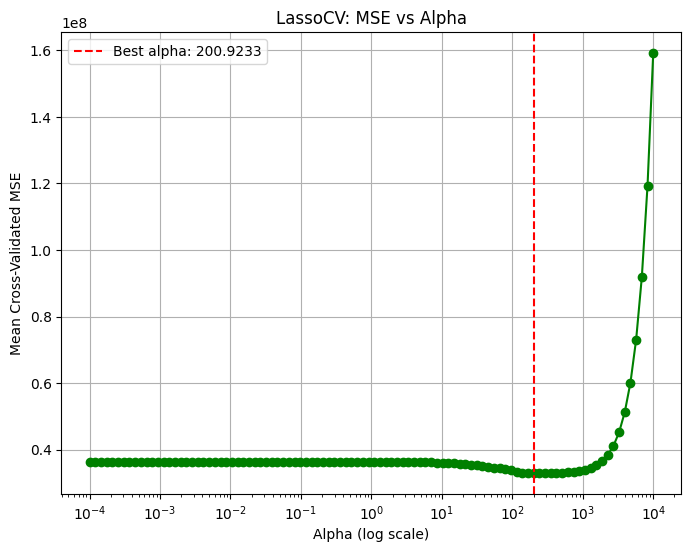

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(lasso_cv.alphas_, np.mean(lasso_cv.mse_path_, axis=1), marker='o', color='green')
plt.axvline(best_alpha, linestyle='--', color='red', label=f'Best alpha: {best_alpha:.4f}')
plt.xscale('log')
plt.xlabel("Alpha (log scale)")
plt.ylabel("Mean Cross-Validated MSE")
plt.title("LassoCV: MSE vs Alpha")
plt.legend()
plt.grid(True)
plt.show()